In [40]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter
import statistics as stats

### Visualization and analysis of title.ratings.csv

In [41]:
titleRatings_df = pd.read_csv('dataset/originalDataset/title.ratings.csv', sep='\t', low_memory=False)
titleRatings_df.head(5)

,tconst,averageRating,numVotes
0,tt0000001,5.7,1901
1,tt0000002,5.9,255
2,tt0000003,6.5,1697
3,tt0000004,5.7,167
4,tt0000005,6.2,2517


Lets plot the average Rating for each show/movie

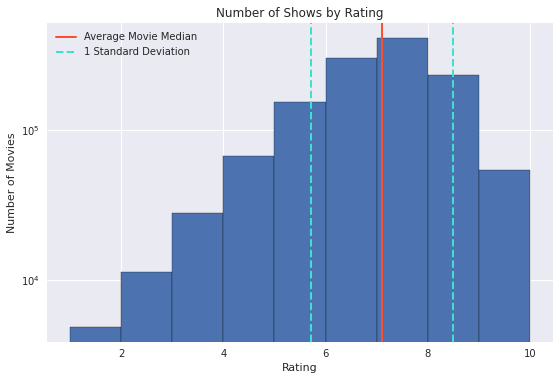

In [42]:
plt.style.use('seaborn')

aveRating = titleRatings_df['averageRating']
bins = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

# the log parameter allows us to see the data in a semi-log scale to see frequency of groups with smaller counts
plt.hist(aveRating, bins=bins, edgecolor='black', log=True)

median_rating = aveRating.median()
standardDev_rating = aveRating.std()

standardDev_left_1 = median_rating - standardDev_rating
standardDev_right_1 = median_rating + standardDev_rating

color_ratings = '#fc4f30'
color_1_std = '#40e0d0'

# Adds a median line allowing us to see infer information about the data
plt.axvline(median_rating, color=color_ratings, label='Average Movie Median', linewidth=2)
plt.axvline(standardDev_left_1, color=color_1_std, linestyle='--', label='1 Standard Deviation', linewidth=2)
plt.axvline(standardDev_right_1, color=color_1_std, linestyle='--', linewidth=2)

plt.legend()

plt.title('Number of Shows by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')

plt.tight_layout()
plt.show()

### Analysis
- The overall median of the average movie ratings is 7.1 indicated by the red line
- The blue dotted lines show the range of movies that lie within one standard deviation away from the mean
- The data follows a normal distribution

Next, lets plot the average rating of a movie/show by the # of votes given to see its popularity

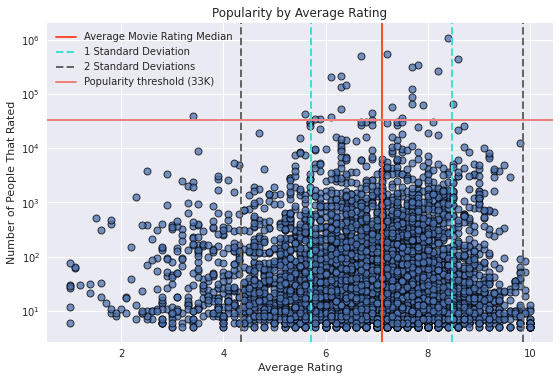

In [43]:
plt.style.use('seaborn')

data_sample = titleRatings_df.sample(frac=0.005)
aveRating = data_sample['averageRating']
popularity = data_sample['numVotes']

# c param determines how much of a particular color (defined by cmap) a point will have
plt.scatter(aveRating, popularity, edgecolor='black', linewidth=1, alpha=0.75)

median_rating = aveRating.median()
standardDev_rating = aveRating.std()

standardDev_left_1 = median_rating - standardDev_rating
standardDev_right_1 = median_rating + standardDev_rating

standardDev_left_2 = median_rating - 2*standardDev_rating
standardDev_right_2 = median_rating + 2*standardDev_rating

color_ratings = '#fc4f30'
popThresh_color = '#f08080'
color_1_std = '#40e0d0'
color_2_std = '#666666'

# Adds a median line allowing us to see infer information about the data
plt.axvline(median_rating, color=color_ratings, label='Average Movie Rating Median', linewidth=2)

plt.axvline(standardDev_left_1, color=color_1_std, linestyle='--', label='1 Standard Deviation', linewidth=2)
plt.axvline(standardDev_right_1, color=color_1_std, linestyle='--', linewidth=2)

plt.axvline(standardDev_left_2, color=color_2_std, linestyle='--', label='2 Standard Deviations', linewidth=2)
plt.axvline(standardDev_right_2, color=color_2_std, linestyle='--', linewidth=2)

plt.axhline(33000, color=popThresh_color, label='Popularity threshold (33K)', linewidth=2)

# cbar = plt.colorbar()
# cbar.set_label('Like/Dislike Ratio')

plt.yscale('log')
plt.legend()

plt.title('Popularity by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Number of People That Rated')

plt.tight_layout()
plt.show()

### Analysis
- This visual shows us the scatterplot between the movies based on their average rating and the total number of votes given for a particular movie/show
- From the scatterplot shown above, we note that there are a larger number of points around the median that go beyond the popularity threshold, specifically points within 1 standard deviation away from the mean
- **Note:** The popularity threshold is simply a measurement to distinguish popular titles by using the number of people who rated the titles (the y-axis), in this case, a title must go beyond 33k votes (or number of people who rated) to be considered popular. This tells us that the best shows don’t necessarily have to be well rated for it to be popular (or known by many people)

### Visualization and analysis of title.akas.csv

In [44]:
titleAkas_df = pd.read_csv('dataset/originalDataset/title.akas.csv', sep='\t', low_memory=False)
titleAkas_df.head(5)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


Find the number of adaptations for each titleId

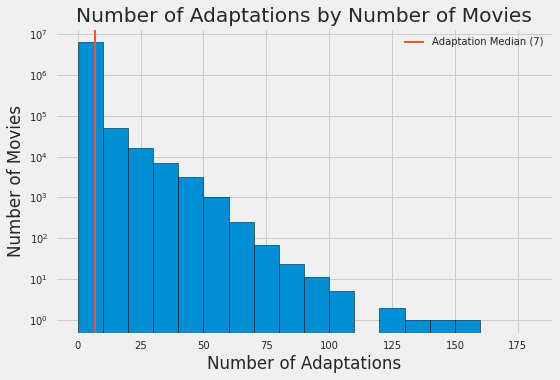

In [45]:
# Create the x- and y-axis
series_akas = titleAkas_df["titleId"]

counter = Counter()

# find the number of adaptations
for index, aka in series_akas.items(): 
    counter.update([aka])

adaptation_cnts = []

for id_title, adaptation_cnt in counter.items():
    adaptation_cnts.append(adaptation_cnt)

#Visualize above information
plt.style.use('fivethirtyeight')

bins = [10*i for i in range(19)]

# the log parameter allows us to see the data in a semi-log scale to see frequency of groups with smaller counts
plt.hist(adaptation_cnts, bins=bins, edgecolor='black', log=True)

# Find median
median_adaptation = stats.median(adaptation_cnts)
color = '#fc4f30'
plt.axvline(median_adaptation, color=color, label=f'Adaptation Median ({median_adaptation})', linewidth=2)

plt.legend()

plt.title('Number of Adaptations by Number of Movies')
plt.ylabel('Number of Movies')
plt.xlabel('Number of Adaptations')

plt.tight_layout()
#plt.savefig('image.png', bbox_inches='tight')
plt.show()

### Analysis
- Examples of adaptations include movies translated into different languages, etc.
- On average (median) a movie will be adopted 7 times, that is, a title on average will
be adapted to 7 different languages

Top 10 regions with the most movies

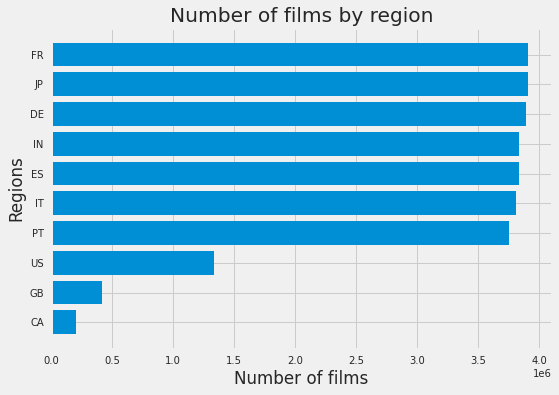

In [46]:
# Create the x- and y-axis
df_region = titleAkas_df[titleAkas_df['region'] != '\\N']
series_region = df_region["region"]

counter = Counter()

# find the number of adaptations
for index, region in series_region.items(): 
    counter.update([region])

regions = []
region_film_counts = []

for region_name, region_count in counter.most_common(10):
    regions.append(region_name)
    region_film_counts.append(region_count)

regions.reverse()
region_film_counts.reverse()

# Visualize above code
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

plt.barh(regions, region_film_counts) # Use this when text labels in the x-axis become too long
# plt.xscale('log')

plt.title("Number of films by region")
plt.xlabel("Number of films")
plt.ylabel("Regions")
#plt.savefig('image.png', bbox_inches='tight')
plt.show()

### Analysis
- More movies are made in the top 5 countries shown above compared to the rest
- France has the most movies released compared to other countries

### Visualization of title.basics.csv

In [47]:
titleBasics_df = pd.read_csv('dataset/originalDataset/title.basics.csv', sep='\t', low_memory=False)
titleBasics_df.head(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


What are the most popular genres?

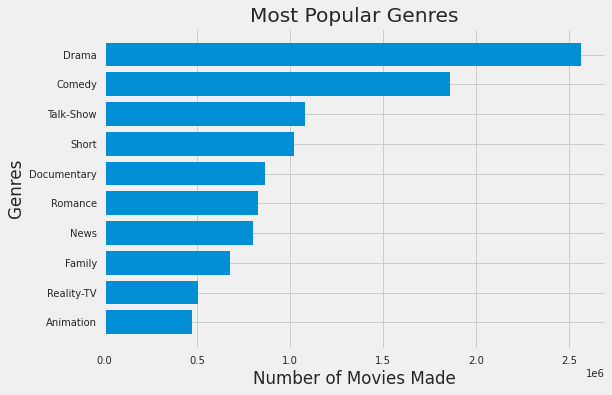

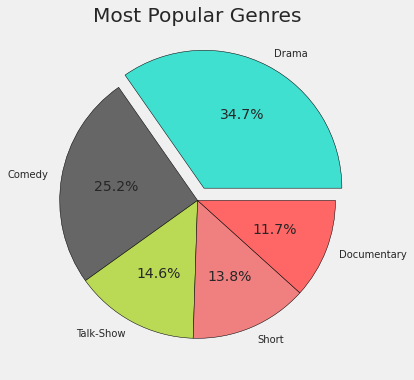

In [48]:
########################## Bar Chart ##########################
plt.style.use("fivethirtyeight")

# Create the x- and y-axis
df_genres = titleBasics_df["genres"]

counter = Counter()

for index, genre in df_genres.items():
    if type(genre) is str:
        some_genres = genre.split(",")
        counter.update(some_genres)
        
genres = []
num_movies = []

for genre, mov_count in counter.most_common(10):
    genres.append(genre)
    num_movies.append(mov_count)

genres.reverse()
num_movies.reverse()

plt.barh(genres, num_movies) # Use this when text labels in the x-axis become too long
# plt.xscale('log')

plt.title("Most Popular Genres")
plt.ylabel("Genres")
plt.xlabel("Number of Movies Made")
plt.show()

########################## Pie Chart ##########################

plt.style.use("fivethirtyeight")

# Create the x- and y-axis
df_genres = titleBasics_df["genres"]

counter = Counter()
for index, genre in df_genres.items():
    # Some genres are 'nan'
    if type(genre) is str:
        some_genres = genre.split(",")
        counter.update(some_genres)

genres = []
num_movies = []
colors = ['#40e0d0','#666666','#bada55','#f08080','#ff6666', '#00ff00']

for genre, mov_count in counter.most_common(5):
    genres.append(genre)
    num_movies.append(mov_count)

explode = [0.1, 0, 0, 0, 0]
plt.pie(num_movies, labels = genres, explode=explode, colors=colors, autopct = '%1.1f%%', 
        wedgeprops= {"edgecolor":"black"})

plt.title("Most Popular Genres")
plt.tight_layout()
plt.show()

### Analysis
- Drama is by the most popular genre
- Comedy and Drama combined make up for more than 50% of the share in genres

How many movies/shows are Adult rated?

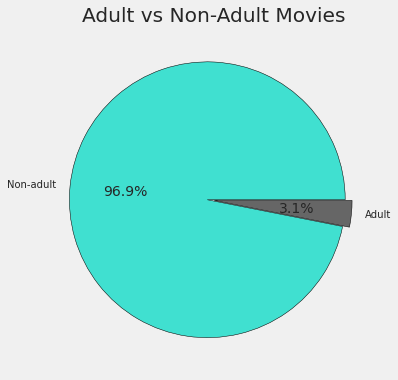

In [51]:
plt.style.use("fivethirtyeight")
# Create the x- and y-axis
df_isAdult = titleBasics_df["isAdult"]

counter = Counter()

for isAdult in df_isAdult:
    if type(isAdult) is str:
        if isAdult == '1':
            counter.update(["Adult"])
        else:
            counter.update(["Non-adult"])
    # if index == 10: break
    # print(type(isAdult))

# We don't wanna show everything
isAdult = []
num_isAdult_movies = []
colors = ['#40e0d0','#666666']

for adult, isAdult_count in counter.most_common(2):
    isAdult.append(adult)
    num_isAdult_movies.append(isAdult_count)

explode = [0.05, 0]
plt.pie(num_isAdult_movies, labels = isAdult, explode=explode, colors=colors, autopct = '%1.1f%%', 
        wedgeprops= {"edgecolor":"black"})

plt.title("Adult vs Non-Adult Movies")
plt.tight_layout()
plt.show()

### Analysis
- There are very few adult rated films in comparison to non-adult

Using the information for adult and non-adult, what are the genres of such films?

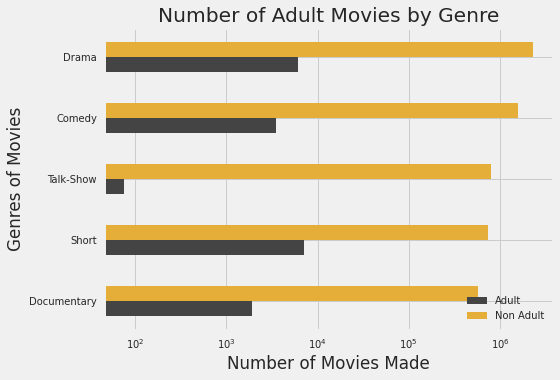

In [52]:
plt.style.use("fivethirtyeight")

# find all the dataframes for each genres
df_genres = titleBasics_df["genres"] # a Series object
counter = Counter()

for genre in df_genres:
    # Some genres are 'nan'
    if type(genre) is str:
        some_genres = genre.split(",")
        counter.update(some_genres)

genres = []

for genre, mov_count in counter.most_common(5):
    genres.append(genre)

# find the number of adult and non-adult films in those genres
isAdult_y = []
isNonAdult_y = []

for genre in genres:
    genre_rows = titleBasics_df[titleBasics_df['genres'].str.contains(genre, na=False)] # dataframe object
    isAdult_y.append(len(genre_rows[genre_rows['isAdult'] == "1"]))
    isNonAdult_y.append(len(genre_rows) - isAdult_count)

genres.reverse()
isAdult_y.reverse()
isNonAdult_y.reverse()

################# Visualize Information Above ###################

x_indexes = np.arange(len(genres))
width = 0.25

plt.barh(x_indexes - (width/2), isAdult_y, height=width, color="#444444", label="Adult")
plt.barh(x_indexes + (width/2), isNonAdult_y, height=width, color="#e5ae38", label="Non Adult")

plt.xscale('log')

plt.legend(loc="lower right")
plt.yticks(x_indexes, labels=genres) # name for each x-tick
plt.title("Number of Adult Movies by Genre")
plt.xlabel("Number of Movies Made")
plt.ylabel("Genres of Movies")

plt.tight_layout()
plt.show()

### Analysis
- The bar chart only considers the top 5 genres for simplicity
- Large majority of the movies are in the family-friendly ratings
- Documentary genre contains the most adult films in comparison to its non adult films

What are the average movie runtimes by type?

In [53]:
# Medians of runtime for titletypes
plt.style.use("fivethirtyeight")

# find the most occuring titleType
df_titleType = titleBasics_df[~titleBasics_df['titleType'].isnull()] # df with no n/a's
series_titleType = df_titleType['titleType'] # series with no n/a's
counter = Counter()

for titleType in series_titleType:
    # Some genres are 'nan'
    if type(titleType) is str:
        counter.update([titleType])

most_occuring_titleType = []

for titleType, count in counter.most_common(50):
    most_occuring_titleType.append(titleType)

# find the median runtime for each titleType
medians = []
df_runtime = df_titleType['runtimeMinutes']

for titleType in most_occuring_titleType:
    temp_df_runtime = df_titleType[df_titleType['titleType'] == titleType]
    series_runtime = temp_df_runtime['runtimeMinutes']
    result = series_runtime.str.replace('\D', '0', regex=True)

    titleMedian = result.median(skipna=True)
    medians.append(titleMedian)

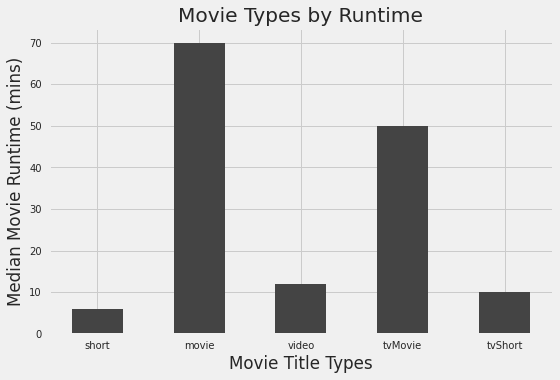

In [54]:
n_titleType = []
n_medians = []

for index, value in enumerate(medians):
    if value > 0:
        n_titleType.append( most_occuring_titleType[index] )
        n_medians.append(value)

# Visualize titleType vs median runtime

plt.style.use("fivethirtyeight")

width = 0.50

plt.bar(n_titleType, n_medians, width=width, color="#444444")

plt.title("Movie Types by Runtime")
plt.xlabel("Movie Title Types")
plt.ylabel("Median Movie Runtime (mins)")

plt.tight_layout()
plt.show()

### Analysis
- Movies have the longest runtime with an average of ~70 minutes

Lets look at the number of movies made each decade

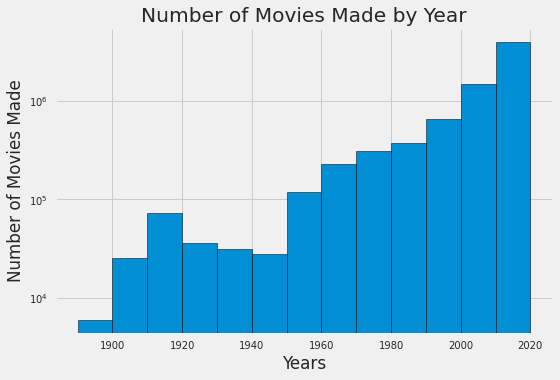

In [55]:
df_startYear = titleBasics_df[~titleBasics_df['startYear'].isnull()] # df with no n/a's
series_startYear = df_startYear['startYear'] # series with no n/a's

years = []

for startYear in series_startYear:
    # Some genres are 'nan', keep track of the count for every year
    if type(startYear) is str and startYear.isnumeric():
        years.append(int(startYear))

# Number of movies made from 1920 to 2020

plt.style.use('fivethirtyeight')

bins = [1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# the log parameter allows us to see the data in a semi-log scale to see frequency of groups with smaller counts
plt.hist(years, bins=bins, edgecolor='black', log=True)

plt.title('Number of Movies Made by Year')
plt.xlabel('Years')
plt.ylabel('Number of Movies Made')

plt.tight_layout()
plt.show()

### Analysis
- This barchart tells us the progression of how many movies are produced from each decade starting from the very
beginning of the industry (back in the 1900s) to now. 
- As we can see, there was a sudden increase in the number of titles produced in the early years, but later slowed down at a certain level.
- However, starting in the 1960s and onwards we notice a more linear increase in the production of various types of titles. We reach the peak of production around 2010-2020 years.